# Grafos

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [63]:
def createEdges(edges, directflag):
    newEdges = []
    for e in edges:
        newEdges.append((e[0],e[1],.5))
        if directflag == 1: newEdges.append((e[1],e[0],.5))
    return newEdges
def createGraph(lowerEdge, upperEdge, edges):
    Gr = nx.DiGraph()
    Gr.add_nodes_from(range(lowerEdge,upperEdge))
    Gr.add_weighted_edges_from(edges)
    plt.figure(1)
    plt.title("Figure 1")
    nx.draw(Gr, with_labels = True)
    return Gr

/Users/alonso/anaconda3/envs/python36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/alonso/anaconda3/envs/python36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


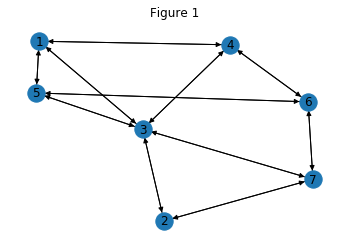

In [64]:
#Creamos el grafo, en este caso, no direccionado. En caso de ser direccionado, añadir TODOS los vertices a la variable
#edges y cambiar direcflag = 0
directflag = 1
edges = [(1,3),(1,4),(1,5),(2,3),(2,7),(3,4),(3,5),(3,7),(4,6),(5,6),(6,7)]
edges = createEdges(edges, directflag)
edges.sort()
G = createGraph(1,8,edges) 

# Distancia

Definimos la distancia entre dos vertices $v_1$ y $v_2$ de G, que denotamos como $d_G(v_1,v_2)$, se define como el largo de la trayectoria mas corta que conecta los vertices $v_1$ y $v_2$, si no existe, entonces $d_G(v_1,v_2)=\infty$

## Ejemplo:
Si deseamos calcular $d_G(6,2)$ dado el grafo de la Figura 1 tenemos que buscar todas las rutas desde 6 a 2 y quedarnos con la mas corta.

#### Calculo de trayectorias:

-  $d_G(6,2) = (6,4), (4,1), (1,3), (3,2) =  4$
-  $d_G(6,2) = (6,5), (5,3), (3,2) = 3$
-  $d_G(6,2) = (6,7), (7,2) = 2$

Por lo que la trayectoria escogida es la ultima, dado que es la mas corta. $d_G(6,2) = 2$

In [60]:
#Calculo de distancia para un solo vertice
#El primer valor es el grafo definido arriba, luego el v1 y finalmente el v2
n = nx.shortest_path_length(G,3,6)
print(n)

2


In [59]:
#Calculo de TODAS las distancias de un nodo.
def distancia(v1, G):
    for v2 in range(1,8):
        if v1 == v2:
            continue
        distancia = nx.shortest_path_length(G,v1,v2)
        print("LA DISTANCIA DE ", v1, " y ", v2, "ES ", distancia)
distancia(6,G)

LA DISTANCIA DE  6  y  1 ES  2
LA DISTANCIA DE  6  y  2 ES  2
LA DISTANCIA DE  6  y  3 ES  2
LA DISTANCIA DE  6  y  4 ES  1
LA DISTANCIA DE  6  y  5 ES  1
LA DISTANCIA DE  6  y  7 ES  1


# Excentricidad

La excentricidad del vertice $v_1$ es la maxima distancia entre $v_1$  y $v_2 \in V$ con $v_1 \neq v_2$, la denotamos como $e_G$.

## Ejemplo:
Determinar $e_G(3)$.

#### Calculo de distancias $d_G(3,n)$, con $n \in {1,2,4,5,6,7}$

- $d_G(3,1) = 1$
- $d_G(3,2) = 1$
- $d_G(3,4) = 1$
- $d_G(3,5) = 1$
- $d_G(3,6) = 2$
- $d_G(3,7) = 1$

Dado que debemos escoger la distancia maxima, el valor de $e_G(3) = 2$. 

In [49]:
def excentricidad(G):
    excentricidadList = []
    for v1 in range(1,8):
        aux = []
        for i in range(1,8):
            if i == v1:
                continue
            e = nx.shortest_path_length(G,v1,i)
            aux.append(e)
        print("LA EXCENTRICIDAD ", "DE ", v1, " ES ",np.max(np.asarray(aux)))
        excentricidadList.append(np.max(np.asarray(aux)))
    return excentricidadList
excentricidad = excentricidad(G) #ejecutamos la funcion

La EXCENTRICIDAD  DE  1  ES  2
La EXCENTRICIDAD  DE  2  ES  2
La EXCENTRICIDAD  DE  3  ES  2
La EXCENTRICIDAD  DE  4  ES  2
La EXCENTRICIDAD  DE  5  ES  2
La EXCENTRICIDAD  DE  6  ES  2
La EXCENTRICIDAD  DE  7  ES  2


# Diametro y radio

Se define el diametro como la mayor distancia entre cualquier par de vertices, es decir, el mayor valor de las excentricidades. Para obtener el valor del diametro debemos calcular el valor de todas las excentricidad, lo que supone calcular el valor de todas las distancias y quedarnos con la de mayor valor.

In [51]:
#Calculo diametro
diametro = np.max(excentricidad)
print(diametro)

2


En contraparte, el radio es la menor de las excentricidades.

In [53]:
#Calculo radio
radio = np.min(excentricidad)
print(radio)

2


# Matriz de adyacencia

In [62]:
def createMatriz(edges):
    edges = edges 
    aux1 = edges[-1][1]
    aux2 = edges[-1][0]
    if aux1 > aux2:
        shape = aux1
    else:
        shape = aux2
    matrix = np.zeros((shape+1,shape+1))
    for e in edges:
        matrix[e[0],e[1]] = 1
    return matrix[1:,1:].astype('int')

In [61]:
matrix = createMatriz(edges)
print(matrix)

[[0 0 1 1 1 0 0]
 [0 0 1 0 0 0 1]
 [1 1 0 1 1 0 1]
 [1 0 1 0 0 1 0]
 [1 0 1 0 0 1 0]
 [0 0 0 1 1 0 1]
 [0 1 1 0 0 1 0]]
